# Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_dataset_path = '/content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset'

## Target Dataset

In [ ]:
imgs = os.listdir(os.path.join(drive_dataset_path, 'Images'))

In [ ]:
attribute_df = pd.read_csv(os.path.join(drive_dataset_path, 'list_attribute.txt'), delimiter=r'\s+', skiprows=1)

In [ ]:
attribute_df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
df = attribute_df[['Male']]

In [ ]:
df.head()

,Male
000001.jpg,-1
000002.jpg,-1
000003.jpg,1
000004.jpg,-1
000005.jpg,-1


In [ ]:
df.replace(-1, 0, inplace=True)

<ipython-input-9-d84944b5799e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(-1, 0, inplace=True)


In [ ]:
df.head()

,Male
000001.jpg,0
000002.jpg,0
000003.jpg,1
000004.jpg,0
000005.jpg,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Male    202599 non-null  int64
dtypes: int64(1)
memory usage: 3.1+ MB


In [ ]:
target_df = df.loc[df.index.isin(imgs)]

In [ ]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 000051.jpg to 202566.jpg
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Male    5000 non-null   int64
dtypes: int64(1)
memory usage: 78.1+ KB


In [ ]:
target_df.value_counts()

Male
0       2953
1       2047
dtype: int64

## Handle Imbalanced Data

### Undersampling

In [ ]:
def undersampling(df, target):
    # Get the counts of each class
    class_counts = df[target].value_counts()

    # Find the minority class
    minority_class = class_counts.idxmin()

    # Get the number of samples in the minority class
    minority_class_count = class_counts[minority_class]

    # Get indices of the majority class
    majority_class_indices = df[df[target] != minority_class].index

    # Randomly sample from the majority class to match the minority class
    undersampled_majority_indices = df[df[target] == minority_class].index.union(
        df.loc[majority_class_indices].sample(n=minority_class_count, random_state=42).index
    )

    # Create the balanced dataset
    balanced_df = df.loc[undersampled_majority_indices]

    # Your balanced dataset
    print(balanced_df[target].value_counts())

    return balanced_df

In [ ]:
target_df = undersampling(target_df, 'Male')

1    2047
0    2047
Name: Male, dtype: int64


## Image Dataset

## Train Val Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_test_df = train_test_split(target_df, random_state=88, test_size=0.3, stratify=target_df['Male'])
val_df, test_df = train_test_split(val_test_df, random_state=88, test_size=0.4, stratify=val_test_df['Male'])

In [ ]:
train_df.head()

,Male
139406.jpg,1
172061.jpg,1
069813.jpg,0
142502.jpg,0
136281.jpg,0


In [ ]:
train_df.value_counts()

Male
1       1433
0       1432
dtype: int64

In [ ]:
val_df.head()

,Male
114107.jpg,0
094352.jpg,0
005334.jpg,0
016823.jpg,1
176695.jpg,0


In [ ]:
val_df.value_counts()

Male
0       369
1       368
dtype: int64

In [ ]:
test_df.head()

,Male
054207.jpg,0
016633.jpg,0
159609.jpg,1
198957.jpg,0
173754.jpg,0


In [ ]:
test_df.value_counts()

Male
0       246
1       246
dtype: int64

In [ ]:
train_male_files = train_df[train_df['Male'] == 1].index.to_list()
train_female_files = train_df[train_df['Male'] == 0].index.to_list()

val_male_files = val_df[val_df['Male'] == 1].index.to_list()
val_female_files = val_df[val_df['Male'] == 0].index.to_list()

test_male_files = test_df[test_df['Male'] == 1].index.to_list()
test_female_files = test_df[test_df['Male'] == 0].index.to_list()

In [ ]:
print(f'first 5 train male files: {train_male_files[:5]}')
print(f'first 5 train female files: {train_female_files[:5]}')
print(f'first 5 val male files: {val_male_files[:5]}')
print(f'first 5 val female files: {val_female_files[:5]}')
print(f'first 5 test male files: {test_male_files[:5]}')
print(f'first 5 test female files: {test_female_files[:5]}')

first 5 train male files: ['139406.jpg', '172061.jpg', '002125.jpg', '090773.jpg', '160302.jpg']
first 5 train female files: ['069813.jpg', '142502.jpg', '136281.jpg', '074374.jpg', '006236.jpg']
first 5 val male files: ['016823.jpg', '065387.jpg', '017366.jpg', '157981.jpg', '074839.jpg']
first 5 val female files: ['114107.jpg', '094352.jpg', '005334.jpg', '176695.jpg', '088225.jpg']
first 5 test male files: ['159609.jpg', '045903.jpg', '097471.jpg', '000771.jpg', '108680.jpg']
first 5 test female files: ['054207.jpg', '016633.jpg', '198957.jpg', '173754.jpg', '152701.jpg']


### Create Folder Structure

In [ ]:
train_male_path = os.path.join(drive_dataset_path, 'gender/train/male')
train_female_path = os.path.join(drive_dataset_path, 'gender/train/female')

val_male_path = os.path.join(drive_dataset_path, 'gender/validation/male')
val_female_path = os.path.join(drive_dataset_path, 'gender/validation/female')

test_male_path = os.path.join(drive_dataset_path, 'gender/test/male')
test_female_path = os.path.join(drive_dataset_path, 'gender/test/female')

Run once only

In [ ]:
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/train
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/validation
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/test
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/train/male
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/train/female
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/validation/male
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/validation/female
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/test/male
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/test/female

In [ ]:
# import shutil

Handle missing values while restructure to ignore images which size equal to 0 bytes

In [ ]:
# def copy_files(source, dest, files):
#     # Copy each file from the source to the destination directory
#     for f in files:
#         if os.path.getsize(os.path.join(source, f)) > 0:
#             if not os.path.exists(os.path.join(dest, f)):
#                 source_path = os.path.join(source, f)
#                 destination_path = os.path.join(dest, f)
#                 shutil.copyfile(source_path, destination_path)
#         else:
#             print(f + " is zero length, so ignoring.")

In [ ]:
# def remove_not_existing_files(path, files):
#     rm_files = []
#     for f in os.listdir(path):
#         if f not in files:
#             rm_files.append(f)

#     for f in rm_files:
#         if os.path.exists(os.path.join(path, f)):
#             os.remove(os.path.join(path, f))
#             print(f"File '{f}' has been deleted.")

In [ ]:
# def remove_missing_files(path, files):
#     for f in files:
#         if os.path.exists(os.path.join(path, f)):
#             if not os.path.getsize(os.path.join(path, f)) > 0:
#                 os.remove(os.path.join(path, f))
#                 print(f"File '{f}' has been deleted.")

In [ ]:
# for f in imgs:
#     if os.path.getsize(os.path.join(drive_dataset_path, 'Images', f)) <= 0:
#         print(f)

042013.jpg


In [ ]:
# remove_missing_files(train_male_path, train_male_files)
# remove_missing_files(train_female_path, train_female_files)
# remove_missing_files(val_male_path, val_male_files)
# remove_missing_files(val_female_path, val_female_files)
# remove_missing_files(test_male_path, test_male_files)
# remove_missing_files(test_female_path, test_female_files)

In [ ]:
# copy_files(os.path.join(drive_dataset_path, 'Images'), train_male_path, train_male_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), train_female_path, train_female_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), val_male_path, val_male_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), val_female_path, val_female_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), test_male_path, test_male_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), test_female_path, test_female_files)

042013.jpg is zero length, so ignoring.


In [ ]:
# remove_not_existing_files(train_male_path, train_male_files)
# remove_not_existing_files(train_female_path, train_female_files)
# remove_not_existing_files(val_male_path, val_male_files)
# remove_not_existing_files(val_female_path, val_female_files)
# remove_not_existing_files(test_male_path, test_male_files)
# remove_not_existing_files(test_female_path, test_female_files)

File '113880.jpg' has been deleted.
File '034757.jpg' has been deleted.
File '028651.jpg' has been deleted.
File '017366.jpg' has been deleted.
File '019522.jpg' has been deleted.
File '045793.jpg' has been deleted.
File '040920.jpg' has been deleted.
File '069799.jpg' has been deleted.
File '071482.jpg' has been deleted.
File '158450.jpg' has been deleted.
File '119051.jpg' has been deleted.
File '195404.jpg' has been deleted.
File '152692.jpg' has been deleted.
File '118034.jpg' has been deleted.
File '196018.jpg' has been deleted.
File '192126.jpg' has been deleted.
File '027076.jpg' has been deleted.
File '064078.jpg' has been deleted.
File '012046.jpg' has been deleted.
File '084999.jpg' has been deleted.
File '081058.jpg' has been deleted.
File '030561.jpg' has been deleted.
File '076385.jpg' has been deleted.
File '144461.jpg' has been deleted.
File '033826.jpg' has been deleted.
File '009195.jpg' has been deleted.
File '130671.jpg' has been deleted.
File '149021.jpg' has been d

# Data Preprocessing

In [ ]:
TRAIN_DIR = os.path.join(drive_dataset_path, 'gender/train')
VAL_DIR = os.path.join(drive_dataset_path, 'gender/validation')
TEST_DIR = os.path.join(drive_dataset_path, 'gender/test')

In [ ]:
# WIDTH = 150
# HEIGHT = 150

VGG_SIZE = 224
RESNET_SIZE = 224
GOOGLENET_SIZE = 299

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
def load_data_generator(train_datagen, validation_datagen, test_datagen, train_dir, val_dir, test_dir, width, height):
    # Flow training images in batches of 128 using train_datagen generator
    train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(width, height),
            # batch_size=128,
            keep_aspect_ratio=True,
            class_mode='binary')

    # Flow validation images in batches of 128 using validation_datagen generator
    validation_generator = validation_datagen.flow_from_directory(
            val_dir,
            target_size=(width, height),
            # batch_size=32,
            keep_aspect_ratio=True,
            class_mode='binary')

    test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(width, height),
            # batch_size=32,
            keep_aspect_ratio=True,
            class_mode='binary')

    return train_generator, validation_generator, test_generator

In [ ]:
vgg_train_generator, vgg_validation_generator, vgg_test_generator = load_data_generator(train_datagen, validation_datagen, test_datagen, TRAIN_DIR, VAL_DIR, TEST_DIR, VGG_SIZE, VGG_SIZE)
resnet_train_generator, resnet_validation_generator, resnet_test_generator = load_data_generator(train_datagen, validation_datagen, test_datagen, TRAIN_DIR, VAL_DIR, TEST_DIR, RESNET_SIZE, RESNET_SIZE)
googlenet_train_generator, googlenet_validation_generator, googlenet_test_generator = load_data_generator(train_datagen, validation_datagen, test_datagen, TRAIN_DIR, VAL_DIR, TEST_DIR, GOOGLENET_SIZE, GOOGLENET_SIZE)

Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.


In [ ]:
# Retrieve class indices from ImageDataGenerator
class_indices = vgg_train_generator.class_indices

# Print class indices
print("Class indices:", class_indices)

Class indices: {'female': 0, 'male': 1}


# Model

## Build Model

VGG, GoogLeNet (Inception), ResNet

In [ ]:
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3, ResNet50

In [ ]:
vgg16 = VGG16(weights=None, input_shape=(VGG_SIZE, VGG_SIZE, 3), include_top=False)
vgg19 = VGG19(weights=None, input_shape=(VGG_SIZE, VGG_SIZE, 3), include_top=False)
inceptionV3 = InceptionV3(weights=None, input_shape=(GOOGLENET_SIZE, GOOGLENET_SIZE, 3), include_top=False)
resnet50 = ResNet50(weights=None, input_shape=(RESNET_SIZE, RESNET_SIZE, 3), include_top=False)

# pretrained imagenet
vgg16_pretrained = VGG16(weights='imagenet', input_shape=(VGG_SIZE, VGG_SIZE, 3), include_top=False)
vgg19_pretrained = VGG19(weights='imagenet', input_shape=(VGG_SIZE, VGG_SIZE, 3), include_top=False)
inceptionV3_pretrained = InceptionV3(weights='imagenet', input_shape=(GOOGLENET_SIZE, GOOGLENET_SIZE, 3), include_top=False)
resnet50_pretrained = ResNet50(weights='imagenet', input_shape=(RESNET_SIZE, RESNET_SIZE, 3), include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
def create_model(feature_extractor, input_shape, name, pretrained=False):
    if pretrained:
        for layer in feature_extractor.layers:
            layer.trainable = False

    i = tf.keras.layers.Input(shape=input_shape)
    x = feature_extractor(i)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(i, x, name=name)
    model.summary()

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

## Training Config

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)

In [ ]:
def train_model(model, train_generator, validation_generator):
    history = model.fit(
      train_generator,
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      batch_size=128,
      validation_batch_size=32,
      callbacks=[early_stopping]
    )

    return history

## Transfer Learning

### GoogLeNet

In [ ]:
inceptionV3_pretrained_model = create_model(inceptionV3_pretrained, (GOOGLENET_SIZE, GOOGLENET_SIZE, 3), 'googlenet_pretrained', pretrained=True)

Model: "googlenet_pretrained"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 88912673 (339.17 MB)
Trainable params: 67109889 (256.00 MB)
Non-trainable params: 21802784 (83.17 MB)
______________________________________________________________

In [ ]:
inceptionV3_pretrained_history = train_model(inceptionV3_pretrained_model, googlenet_train_generator, googlenet_validation_generator)

Epoch 1/50
103/103 [==============================] - 722s 7s/step - loss: 4.4242 - accuracy: 0.8955 - val_loss: 2.2457 - val_accuracy: 0.9219
Epoch 2/50
103/103 [==============================] - 20s 191ms/step - loss: 0.9392 - accuracy: 0.9472 - val_loss: 1.8523 - val_accuracy: 0.9280
Epoch 3/50
103/103 [==============================] - 19s 188ms/step - loss: 0.4265 - accuracy: 0.9716 - val_loss: 1.9759 - val_accuracy: 0.9194
Epoch 4/50
103/103 [==============================] - 20s 189ms/step - loss: 0.1856 - accuracy: 0.9801 - val_loss: 1.6537 - val_accuracy: 0.9280
Epoch 5/50
103/103 [==============================] - 20s 193ms/step - loss: 0.0946 - accuracy: 0.9890 - val_loss: 1.6033 - val_accuracy: 0.9255
Epoch 5: early stopping


### ResNet

In [ ]:
resnet50_pretrained_model = create_model(resnet50_pretrained, (RESNET_SIZE, RESNET_SIZE, 3), 'resnet50_pretrained', pretrained=True)

Model: "resnet50_pretrained"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               51380736  
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 74968961 (285.98 MB)
Trainable params: 51381249 (196.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_______________________________________________________________

In [ ]:
resnet50_pretrained_history = train_model(resnet50_pretrained_model, resnet_train_generator, resnet_validation_generator)

Epoch 1/50
103/103 [==============================] - 23s 184ms/step - loss: 1.1617 - accuracy: 0.5367 - val_loss: 0.9683 - val_accuracy: 0.4994
Epoch 2/50
103/103 [==============================] - 18s 179ms/step - loss: 0.6960 - accuracy: 0.6075 - val_loss: 0.5348 - val_accuracy: 0.6947
Epoch 3/50
103/103 [==============================] - 15s 144ms/step - loss: 0.5129 - accuracy: 0.7630 - val_loss: 0.4862 - val_accuracy: 0.7436
Epoch 4/50
103/103 [==============================] - 15s 144ms/step - loss: 0.5036 - accuracy: 0.7587 - val_loss: 0.4481 - val_accuracy: 0.8242
Epoch 5/50
103/103 [==============================] - 15s 144ms/step - loss: 0.5216 - accuracy: 0.7572 - val_loss: 0.4491 - val_accuracy: 0.8303
Epoch 6/50
103/103 [==============================] - 15s 144ms/step - loss: 0.4663 - accuracy: 0.7715 - val_loss: 0.5331 - val_accuracy: 0.7143
Epoch 7/50
103/103 [==============================] - 15s 145ms/step - loss: 0.4505 - accuracy: 0.7905 - val_loss: 0.4334 - val_ac

### VGG

In [ ]:
vgg16_pretrained_model = create_model(vgg16_pretrained, (VGG_SIZE, VGG_SIZE, 3), 'vgg16_pretrained', pretrained=True)
vgg19_pretrained_model = create_model(vgg19_pretrained, (VGG_SIZE, VGG_SIZE, 3), 'vgg19_pretrained', pretrained=True)

In [ ]:
vgg16_pretrained_history = train_model(vgg16_pretrained_model, vgg_train_generator, vgg_validation_generator)

In [ ]:
vgg19_pretrained_history = train_model(vgg19_pretrained_model, vgg_train_generator, vgg_validation_generator)

## No Transfer Learning

### GoogLeNet

In [ ]:
inceptionV3_model = create_model(inceptionV3, (GOOGLENET_SIZE, GOOGLENET_SIZE, 3), 'googlenet')

Model: "googlenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 flatten_8 (Flatten)         (None, 131072)            0         
                                                                 
 dense_16 (Dense)            (None, 512)               67109376  
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 88912673 (339.17 MB)
Trainable params: 88878241 (339.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________

In [ ]:
inceptionV3_history = train_model(inceptionV3_pretrained_model, googlenet_train_generator, googlenet_validation_generator)

### Resnet

In [ ]:
resnet50_model = create_model(resnet50, (RESNET_SIZE, RESNET_SIZE, 3), 'resnet50')

Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               51380736  
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 74968961 (285.98 MB)
Trainable params: 74915841 (285.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
resnet50_history = train_model(resnet50_model, resnet_train_generator, resnet_validation_generator)

Epoch 1/50
103/103 [==============================] - 82s 387ms/step - loss: 7.6456 - accuracy: 0.5128 - val_loss: 0.7139 - val_accuracy: 0.5006
Epoch 2/50
103/103 [==============================] - 38s 368ms/step - loss: 0.6613 - accuracy: 0.6506 - val_loss: 0.7216 - val_accuracy: 0.5104
Epoch 3/50
103/103 [==============================] - 41s 395ms/step - loss: 0.5158 - accuracy: 0.7364 - val_loss: 0.6224 - val_accuracy: 0.6728
Epoch 4/50
103/103 [==============================] - 38s 369ms/step - loss: 0.3285 - accuracy: 0.8607 - val_loss: 0.4074 - val_accuracy: 0.8193
Epoch 5/50
103/103 [==============================] - 38s 370ms/step - loss: 0.2467 - accuracy: 0.8949 - val_loss: 0.3270 - val_accuracy: 0.8608
Epoch 6/50
103/103 [==============================] - 41s 394ms/step - loss: 0.1759 - accuracy: 0.9282 - val_loss: 0.4171 - val_accuracy: 0.8278
Epoch 7/50
103/103 [==============================] - 41s 397ms/step - loss: 0.1511 - accuracy: 0.9356 - val_loss: 0.2671 - val_ac

### VGG

In [ ]:
vgg16_model = create_model(vgg16, (VGG_SIZE, VGG_SIZE, 3), 'vgg16')
vgg19_model = create_model(vgg19, (VGG_SIZE, VGG_SIZE, 3), 'vgg19')

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               12845568  
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27560769 (105.14 MB)
Trainable params: 12846081 (49.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Model: "vgg1

In [ ]:
vgg16_history = train_model(vgg16_model, vgg_train_generator, vgg_validation_generator)

Epoch 1/50
  1/103 [..............................] - ETA: 58:22 - loss: 0.6932 - accuracy: 0.4688

KeyboardInterrupt: ignored

In [ ]:
vgg19_history = train_model(vgg19_model, vgg_train_generator, vgg_validation_generator)

# Evaluation

In [ ]:
def plot_accuracy(history):
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot(epochs, acc, 'r')
    plt.plot(epochs, val_acc, 'b')
    plt.title('Training and validation accuracy')
    plt.figure()

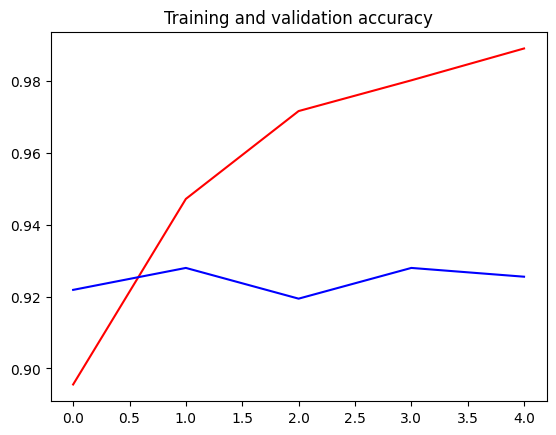

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_accuracy(inceptionV3_pretrained_history)

In [ ]:
plot_accuracy(resnet50_pretrained_history)